In [56]:
import pandas as pd
import numpy as np

In [57]:
# Include the Bagging classifier
from sklearn.ensemble import BaggingClassifier

In [58]:
dataframe = pd.read_csv("pima.csv")

In [59]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
dataframe.shape

(768, 9)

In [64]:
dataframe.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [65]:
# convert to numpy arrays
array = dataframe.values

In [66]:
np.set_printoptions(suppress=True, linewidth=120)

In [67]:
array[:5]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,  32.   ,   1.   ],
       [  1.   ,  89.   ,  66.   ,  23.   ,  94.   ,  28.1  ,   0.167,  21.   ,   0.   ],
       [  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,  33.   ,   1.   ]])

In [68]:
X = array[:, 0:8]
y = array[:, 8]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# For testing, we choose to split our data to 75% train and 25% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [71]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [72]:
y_train.shape, y_test.shape

((576,), (192,))

#### Try out just the decision tree as a model

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [74]:
# instantiate a decision tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
# accuracy on training data
y_pred = dt.predict(X_train)
print("Training accuracy : ", metrics.accuracy_score(y_train, y_pred))

# accuracy on testing data
y_pred = dt.predict(X_test)
print("Testing accuracy  : ", metrics.accuracy_score(y_test, y_pred))

Training accuracy :  1.0
Testing accuracy  :  0.75


use cross validate ...to detect overfitting...

In [76]:
from sklearn.model_selection import cross_validate

In [77]:
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

scores = cross_validate(dt, 
                        X, 
                        y, 
                        cv=5, 
                        scoring=scoring, 
                        return_train_score=True 
                        #return_estimator=True
                       )

#print(scores.keys())
print('  Training accuracy : ', scores['train_accuracy'], ' mean : ', round(scores['train_accuracy'].mean(), 2))
print('  testing  accuracy : ', scores['test_accuracy'] , ' mean : ', round(scores['test_accuracy'].mean(),2 ))
print()
print('  Training f1_macro : ', scores['train_f1_macro'], ' mean : ', round(scores['train_f1_macro'].mean(), 2))
print('  testing  f1_macro : ', scores['test_f1_macro'] , ' mean : ', round(scores['test_f1_macro'].mean(),2 ))
print()
print('  Training precision : ', scores['train_precision_macro'], ' mean : ', round(scores['train_precision_macro'].mean(), 2))
print('  testing  precision : ', scores['test_precision_macro'] , ' mean : ', round(scores['test_precision_macro'].mean(),2 ))
print()
print('  Training recall : ', scores['train_recall_macro'], ' mean : ', round(scores['train_recall_macro'].mean(), 2))
print('  testing  recall : ', scores['test_recall_macro'] , ' mean : ', round(scores['test_recall_macro'].mean(),2 ))

  Training accuracy :  [1. 1. 1. 1. 1.]  mean :  1.0
  testing  accuracy :  [0.68831169 0.65584416 0.68831169 0.78431373 0.69934641]  mean :  0.7

  Training f1_macro :  [1. 1. 1. 1. 1.]  mean :  1.0
  testing  f1_macro :  [0.63679245 0.6413096  0.65158371 0.75614586 0.65089286]  mean :  0.67

  Training precision :  [1. 1. 1. 1. 1.]  mean :  1.0
  testing  precision :  [0.65178571 0.64185848 0.655      0.76369048 0.66342495]  mean :  0.68

  Training recall :  [1. 1. 1. 1. 1.]  mean :  1.0
  testing  recall :  [0.63222222 0.65407407 0.64925926 0.75075472 0.64584906]  mean :  0.67


#### Try out random forest classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [80]:
# accuracy on training data
y_pred = rf.predict(X_train)
print("Training accuracy : ", metrics.accuracy_score(y_train, y_pred))

# accuracy on testing data
y_pred = rf.predict(X_test)
print("Testing accuracy  : ", metrics.accuracy_score(y_test, y_pred))

Training accuracy :  1.0
Testing accuracy  :  0.7239583333333334


In [81]:
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

scores = cross_validate(rf, 
                        X, 
                        y, 
                        cv=5, 
                        scoring=scoring, 
                        return_train_score=True 
                        #return_estimator=True
                       )

print('  Training accuracy : ', scores['train_accuracy'], ' mean : ', round(scores['train_accuracy'].mean(), 2))
print('  testing  accuracy : ', scores['test_accuracy'] , ' mean : ', round(scores['test_accuracy'].mean(),2 ))
print()
print('  Training f1_macro : ', scores['train_f1_macro'], ' mean : ', round(scores['train_f1_macro'].mean(), 2))
print('  testing  f1_macro : ', scores['test_f1_macro'] , ' mean : ', round(scores['test_f1_macro'].mean(),2 ))
print()
print('  Training precision : ', scores['train_precision_macro'], ' mean : ', round(scores['train_precision_macro'].mean(), 2))
print('  testing  precision : ', scores['test_precision_macro'] , ' mean : ', round(scores['test_precision_macro'].mean(),2 ))
print()
print('  Training recall : ', scores['train_recall_macro'], ' mean : ', round(scores['train_recall_macro'].mean(), 2))
print('  testing  recall : ', scores['test_recall_macro'] , ' mean : ', round(scores['test_recall_macro'].mean(),2 ))

  Training accuracy :  [1.         0.99837134 1.         1.         0.99837398]  mean :  1.0
  testing  accuracy :  [0.76623377 0.74025974 0.75324675 0.82352941 0.76470588]  mean :  0.77

  Training f1_macro :  [1.         0.99820482 1.         1.         0.99821028]  mean :  1.0
  testing  f1_macro :  [0.73868778 0.71231085 0.69772727 0.79623144 0.72023568]  mean :  0.73

  Training precision :  [1.         0.99875312 1.         1.         0.99875312]  mean :  1.0
  testing  precision :  [0.74384615 0.71436652 0.74681373 0.81515847 0.74932524]  mean :  0.75

  Training recall :  [1.         0.99766355 1.         1.         0.99767442]  mean :  1.0
  testing  recall :  [0.73481481 0.71055556 0.68648148 0.78518868 0.70915094]  mean :  0.73


- Overfitting case - can we improve this ?

max_depth = 4


In [82]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=444)

rf.fit(X_train, y_train)

# accuracy on training data
y_pred = rf.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = rf.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.8645833333333334
Testing accuracy : 0.75


#### Try out Logistic regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression(solver='lbfgs', max_iter=50000)

lr.fit(X_train, y_train)

# accuracy on training data
y_pred = lr.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = lr.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.796875
Testing accuracy : 0.7447916666666666


#### Try KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='minkowski', p=4)

knn.fit(X_train, y_train)

# accuracy on training data
y_pred = knn.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = knn.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.7951388888888888
Testing accuracy : 0.6979166666666666


#### try out bagging classifier with decision tree

In [88]:
# instatiate the bagging classifier
num_trees = 100

# instantiate a decision tree
base_dt = DecisionTreeClassifier(max_depth=5)

bgg_dt = BaggingClassifier(base_estimator=base_dt, 
                           n_estimators  =num_trees)

bgg_dt.fit(X_train, y_train)

# accuracy on training data
y_pred = bgg_dt.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = bgg_dt.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.890625
Testing accuracy : 0.7552083333333334


#### try out bagging classifier with RF

In [89]:
# instatiate the bagging classifier
num_trees = 5

# instantiate a random forest
base_rf = RandomForestClassifier(max_depth=4, 
                                 n_estimators=50)

bgg_rf  = BaggingClassifier(base_estimator=rf, 
                            n_estimators=num_trees)

bgg_rf.fit(X_train, y_train)

# accuracy on training data
y_pred = bgg_rf.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = bgg_rf.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.84375
Testing accuracy : 0.75


#### try out bagging classifier with KNN

In [90]:
# instatiate the bagging classifier
num_trees = 5

# instantiate a random forest
base_knn = KNeighborsClassifier(n_neighbors=7, 
                                weights='uniform', 
                                metric='minkowski', 
                                p=4)

bgg_knn  = BaggingClassifier(base_estimator=base_knn, 
                             n_estimators  =num_trees)

bgg_knn.fit(X_train, y_train)

# accuracy on training data
y_pred = bgg_knn.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = bgg_knn.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.7899305555555556
Testing accuracy : 0.703125


#### try out bagging classifier with LR

In [91]:
# instatiate the bagging classifier
num_trees = 5

# instantiate a random forest
base_lr = LogisticRegression(solver='lbfgs', max_iter=50000)

bgg_lr  = BaggingClassifier(base_estimator=lr, 
                            n_estimators=num_trees)

bgg_lr.fit(X_train, y_train)

# accuracy on training data
y_pred = bgg_lr.predict(X_train)
print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# accuracy on testing data
y_pred = bgg_lr.predict(X_test)
print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))

Training accuracy : 0.7934027777777778
Testing accuracy : 0.7447916666666666


#### But why the overfitting???

#### let us try `learning curve`

In [95]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [96]:
models = [dt,                rf,              knn,           lr, 
          bgg_dt,            bgg_rf,          bgg_knn,       bgg_lr
         ]

labels = ['Decision Trees', 'Random Forest', 'KNN',         'Logistic Regression', 
          'Bagging-DT',     'Bagging-RF',    'Bagging-KNN', 'Bagging-LR'
         ]

CPU times: total: 1min 15s
Wall time: 48.8 s


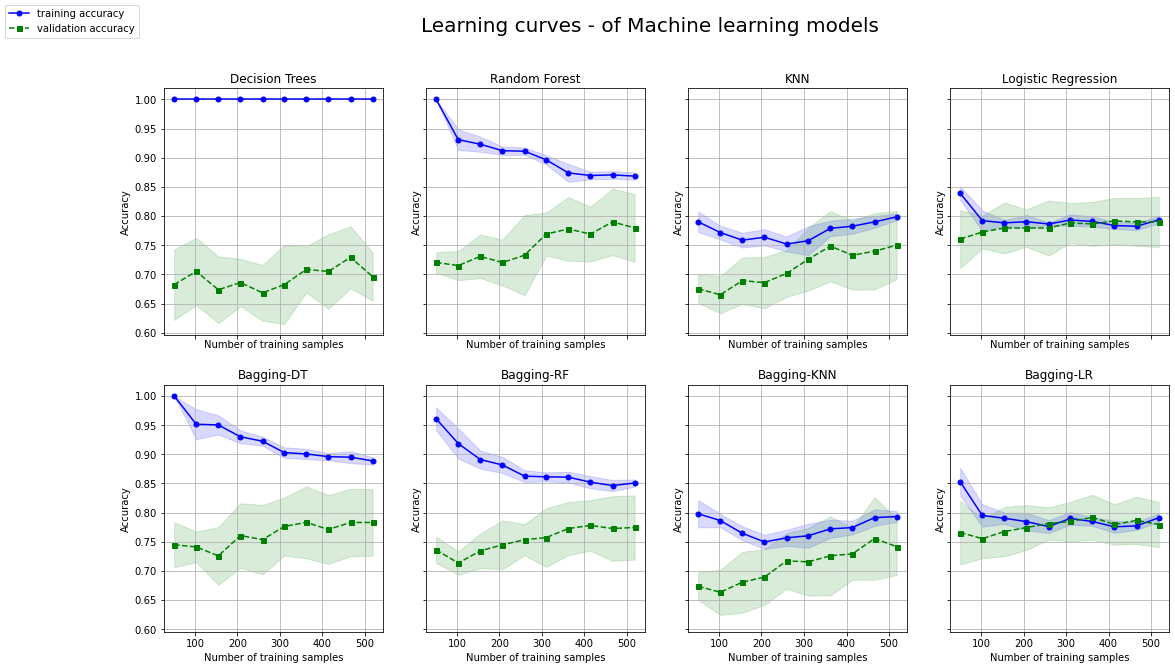

In [97]:
%%time
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 10), sharex=True, sharey=True)

plt_nbr_row = 0
plt_nbr_col = 0

fig.suptitle('Learning curves - of Machine learning models', fontsize = 20) # or plt.suptitle('Main title')

for clf, label in zip(models, labels):
    
    # execute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator=clf,
                                                            X=X_train,
                                                            y=y_train,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            cv=10
                                                         )
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores,  axis=1)

    test_mean  = np.mean(test_scores, axis=1)
    test_std   = np.std(test_scores,  axis=1)
    
    ax[plt_nbr_row, plt_nbr_col].plot(  train_sizes, 
                                         train_mean,
                                         color='blue', 
                                         marker='o',
                                         markersize=5,
                                         label='training accuracy')

    ax[plt_nbr_row, plt_nbr_col].fill_between(  train_sizes,
                                                 train_mean + train_std,
                                                 train_mean - train_std,
                                                 alpha=0.15, 
                                                 color='blue')  

    ax[plt_nbr_row, plt_nbr_col].plot(  train_sizes, 
                                         test_mean,
                                         color='green', 
                                         linestyle='--',
                                         marker='s', 
                                         markersize=5,
                                         label='validation accuracy')

    ax[plt_nbr_row, plt_nbr_col].fill_between(  train_sizes,
                                                 test_mean + test_std,
                                                 test_mean - test_std,
                                                 alpha=0.15, 
                                                 color='green')

    ax[plt_nbr_row, plt_nbr_col].grid()
    ax[plt_nbr_row, plt_nbr_col].set_xlabel('Number of training samples')
    ax[plt_nbr_row, plt_nbr_col].set_ylabel('Accuracy')
    ax[plt_nbr_row, plt_nbr_col].set_title(label)
    #ax[plt_nbr_row, plt_nbr_col].legend(loc='lower right')
    
    plt_nbr_col +=1 
    
    if plt_nbr_col > 3:
        plt_nbr_col  = 0
        plt_nbr_row += 1
        
lines, labels = ax[0,0].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper left');